In [1]:
import numpy as np 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

In [2]:
pr = pd.read_csv('PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")
sr = pd.read_csv('ShareRaceByCity.csv', encoding="windows-1252")
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

In [3]:
pr.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [4]:
pr["Geographic Area"].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [5]:
pr["Geographic Area"].nunique()

51

In [6]:
pr["City"].nunique()

24255

In [7]:
pr.poverty_rate.value_counts()

0       1464
-        201
7.4      129
6.7      129
10.9     128
        ... 
73.5       1
92         1
73.8       1
55.9       1
83.6       1
Name: poverty_rate, Length: 771, dtype: int64

In [8]:
pr.poverty_rate.replace('-',0.0,inplace = True)

In [9]:
pr.poverty_rate.value_counts()

0       1464
0.0      201
7.4      129
6.7      129
10.9     128
        ... 
73.5       1
92         1
73.8       1
55.9       1
83.6       1
Name: poverty_rate, Length: 771, dtype: int64

In [10]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [11]:
pr.poverty_rate = pr.poverty_rate.astype(float)

In [12]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  29329 non-null  object 
 1   City             29329 non-null  object 
 2   poverty_rate     29329 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [13]:
pr.groupby("Geographic Area").poverty_rate.mean().head()

Geographic Area
AK    18.678592
AL    20.611795
AR    22.963216
AZ    25.268071
CA    16.888371
Name: poverty_rate, dtype: float64

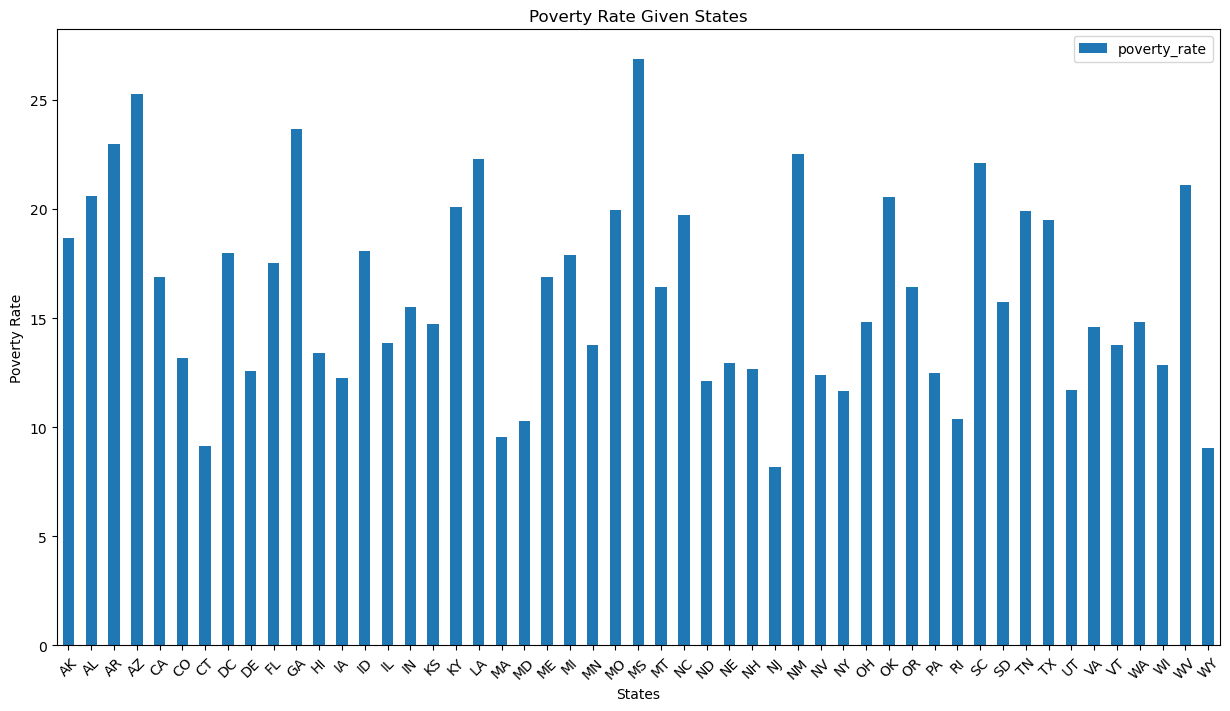

In [14]:
pr.groupby("Geographic Area").poverty_rate.mean().plot.bar(figsize=(15,8))
plt.xticks(rotation=45)
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate Given States')
plt.legend();

In [15]:
pr.groupby("Geographic Area").poverty_rate.mean().sort_values(ascending=False).head()

Geographic Area
MS    26.884254
AZ    25.268071
GA    23.663636
AR    22.963216
NM    22.507675
Name: poverty_rate, dtype: float64

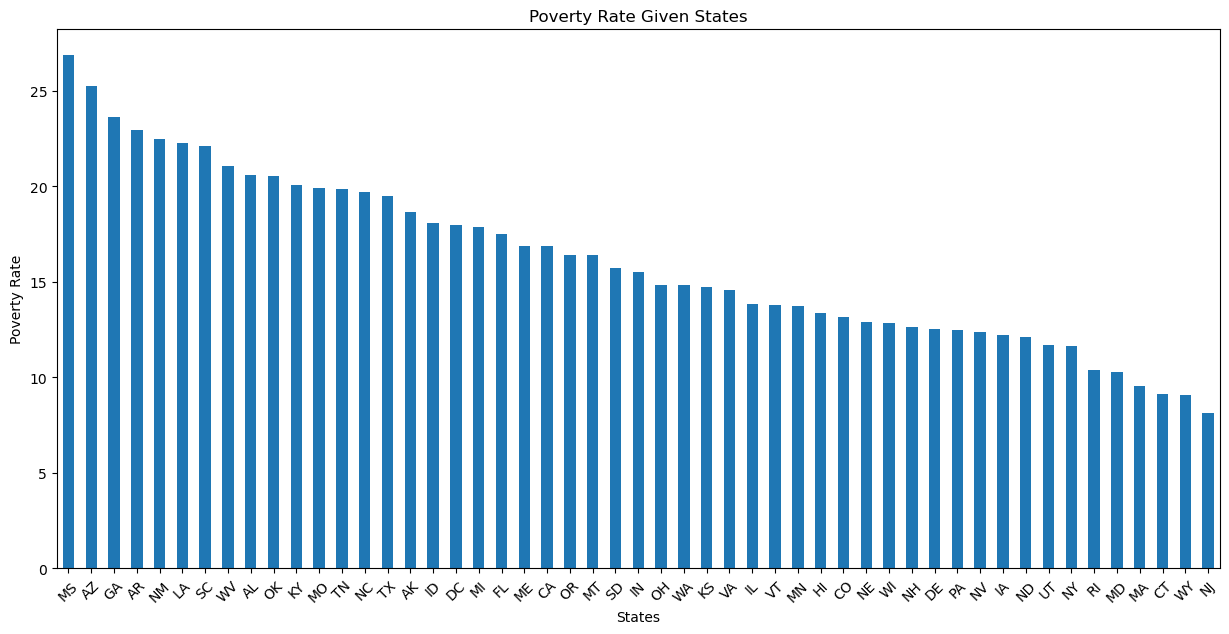

In [16]:
pr.groupby("Geographic Area").poverty_rate.mean().sort_values(ascending=False).plot.bar(figsize=(15,7))
plt.xticks(rotation=45)
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate Given States');

In [17]:
aa=pr.groupby("Geographic Area").poverty_rate.mean().sort_values(ascending=False).index

In [18]:
bb=pr.groupby("Geographic Area").poverty_rate.mean().sort_values(ascending=False).values

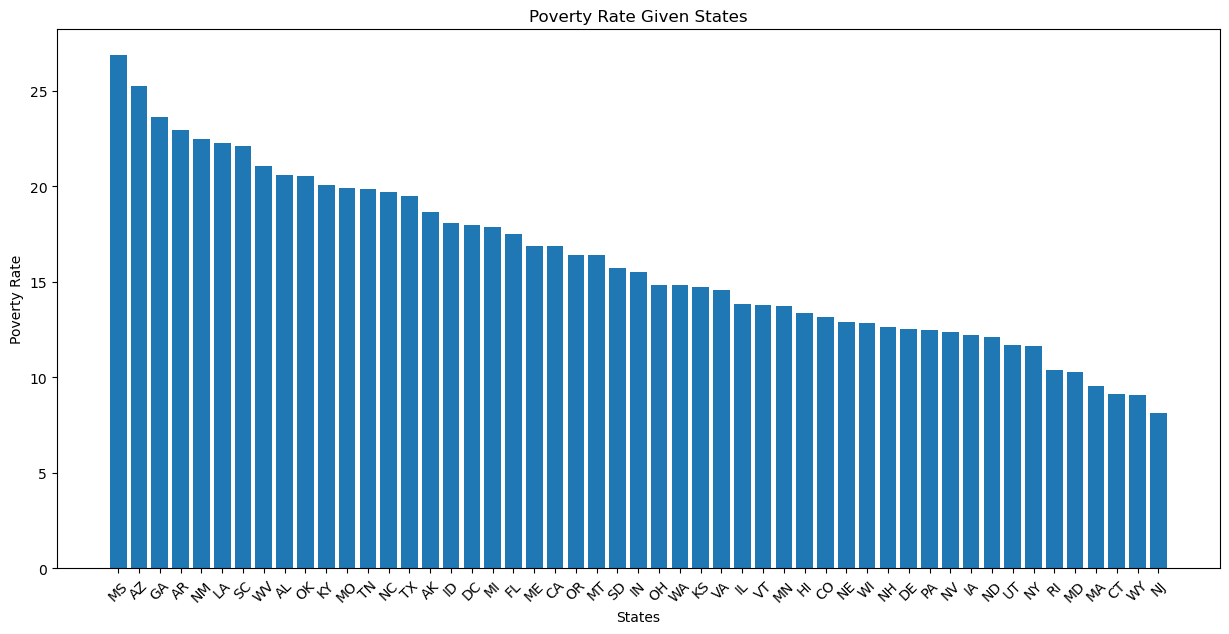

In [19]:
plt.figure(figsize=(15,7))
plt.bar(aa, bb)
plt.xticks(rotation=45)
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate Given States');

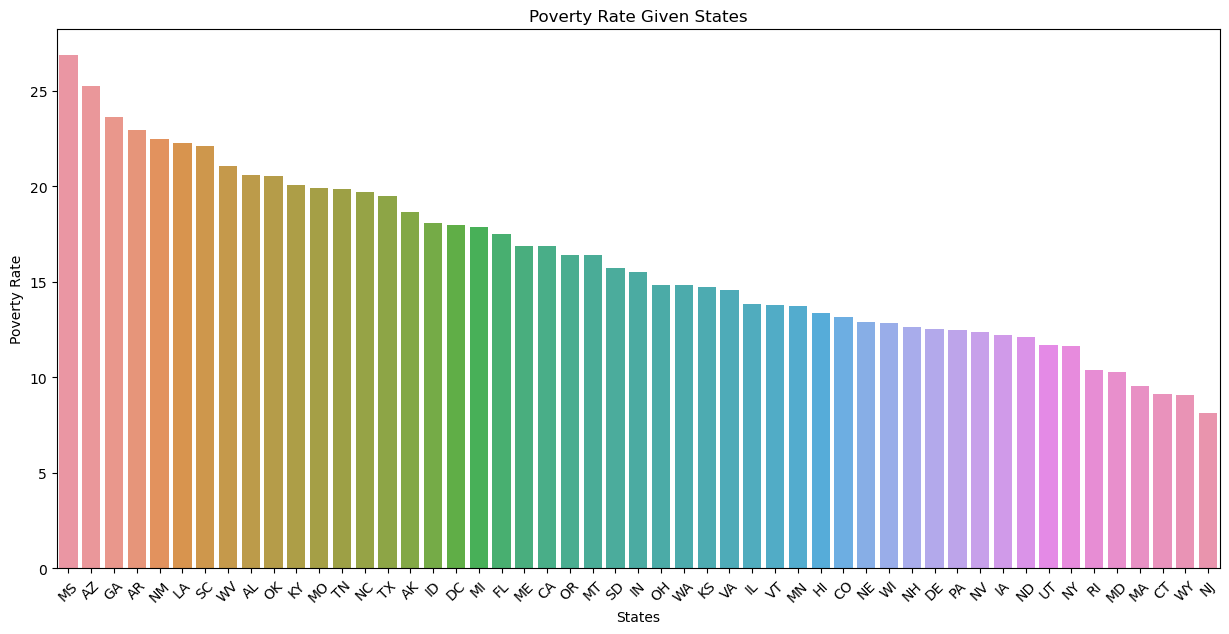

In [20]:
plt.figure(figsize=(15,7))
sns.barplot(x=pr["Geographic Area"], y=pr["poverty_rate"], order=aa, ci=None)
plt.xticks(rotation=45)
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate Given States');

In [21]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [22]:
kill.shape

(2535, 14)

In [23]:
kill.name.value_counts()

TK TK              49
Michael Johnson     2
Brandon Jones       2
Eric Harris         2
Michael Brown       2
                   ..
Jack Yantis         1
James Covington     1
Jeremy Mardis       1
Joseph Tyndall      1
Dwayne Jeune        1
Name: name, Length: 2481, dtype: int64

In [24]:
pairs = kill.name[kill.name != 'TK TK'].str.split()
pairs.head()

0             [Tim, Elliot]
1      [Lewis, Lee, Lembke]
2    [John, Paul, Quintero]
3        [Matthew, Hoffman]
4      [Michael, Rodriguez]
Name: name, dtype: object

In [25]:
type(pairs)

pandas.core.series.Series

In [26]:
df = pd.DataFrame(pairs)

In [27]:
df.head()

,name
0,"[Tim, Elliot]"
1,"[Lewis, Lee, Lembke]"
2,"[John, Paul, Quintero]"
3,"[Matthew, Hoffman]"
4,"[Michael, Rodriguez]"


In [28]:
df["len"] = df.name.apply(lambda x : len(x))

In [29]:
df.head()

,name,len
0,"[Tim, Elliot]",2
1,"[Lewis, Lee, Lembke]",3
2,"[John, Paul, Quintero]",3
3,"[Matthew, Hoffman]",2
4,"[Michael, Rodriguez]",2


In [30]:
df["len_new"] = df.name.apply(len)

In [31]:
df.head()

,name,len,len_new
0,"[Tim, Elliot]",2,2
1,"[Lewis, Lee, Lembke]",3,3
2,"[John, Paul, Quintero]",3,3
3,"[Matthew, Hoffman]",2,2
4,"[Michael, Rodriguez]",2,2


In [32]:
df.len.value_counts()

2    1602
3     836
4      48
Name: len, dtype: int64

In [33]:
two_names = df.name[df.len == 2]

In [34]:
two_names.head()

0           [Tim, Elliot]
3      [Matthew, Hoffman]
4    [Michael, Rodriguez]
7        [Brock, Nichols]
8        [Autumn, Steele]
Name: name, dtype: object

In [35]:
 three_names = df.name[df.len == 3]

In [36]:
 four_names = df.name[df.len == 4]

In [37]:
a,b = zip(*two_names)

In [38]:
a[:5]

('Tim', 'Matthew', 'Michael', 'Brock', 'Autumn')

In [39]:
b[:5]

('Elliot', 'Hoffman', 'Rodriguez', 'Nichols', 'Steele')

In [40]:
c,d,e = zip(*three_names)

In [41]:
three_names.head()

1       [Lewis, Lee, Lembke]
2     [John, Paul, Quintero]
5      [Kenneth, Joe, Brown]
6    [Kenneth, Arnold, Buck]
9        [Leslie, Sapp, III]
Name: name, dtype: object

In [42]:
c[:5]

('Lewis', 'John', 'Kenneth', 'Kenneth', 'Leslie')

In [43]:
d[:5]

('Lee', 'Paul', 'Joe', 'Arnold', 'Sapp')

In [44]:
e[:5]

('Lembke', 'Quintero', 'Brown', 'Buck', 'III')

In [45]:
f,g,h,i = zip(*four_names)

In [46]:
four_names.head()

12      [Hashim, Hanif, Ibn, Abdul-Rasheed]
14    [Omarr, Julian, Maximillian, Jackson]
47    [Miguel, Angel, de, Santos-Rodriguez]
54          [Jose, Antonio, Espinoza, Ruiz]
78             [Francis, Murphy, Rose, III]
Name: name, dtype: object

In [47]:
f[:5]

('Hashim', 'Omarr', 'Miguel', 'Jose', 'Francis')

In [48]:
total_list = a+b+c+d+e+f+g+h+i

In [49]:
len(a)

1602

In [50]:
len(total_list)

5904

In [51]:
name_count=Counter(total_list)

In [52]:
name_count

Counter({'Tim': 3,
         'Matthew': 24,
         'Michael': 91,
         'Brock': 2,
         'Autumn': 1,
         'Patrick': 15,
         'Ron': 2,
         'Loren': 3,
         'Thomas': 27,
         'Jimmy': 5,
         'Andy': 1,
         'Tommy': 3,
         'Brian': 12,
         'Salvador': 4,
         'Richard': 36,
         'Marcus': 5,
         'Mario': 8,
         'Talbot': 1,
         'Robert': 48,
         'Donte': 3,
         'Jose': 28,
         'Nathan': 6,
         'Scott': 27,
         'Zaki': 1,
         'Terence': 3,
         'Pablo': 4,
         'Daniel': 46,
         'Jonathan': 13,
         'Carter': 5,
         'Paul': 19,
         'Dewayne': 3,
         'Isaac': 2,
         'Andrew': 20,
         'Tiano': 1,
         'Kristiana': 1,
         'Demaris': 1,
         'Wendell': 1,
         'Daryl': 1,
         'Darin': 1,
         'William': 47,
         'Jessie': 3,
         'Raymond': 11,
         'David': 57,
         'Chris': 3,
         'Jermonte': 1,
    

In [53]:
most_common_names = name_count.most_common(15)

In [54]:
most_common_names

[('Michael', 91),
 ('David', 57),
 ('James', 57),
 ('Robert', 48),
 ('Joseph', 48),
 ('William', 47),
 ('Daniel', 46),
 ('John', 42),
 ('Christopher', 40),
 ('Lee', 38),
 ('Richard', 36),
 ('Smith', 36),
 ('Anthony', 32),
 ('Johnson', 32),
 ('J.', 32)]

In [55]:
x,y = zip(*most_common_names)

In [56]:
x,y =list(x), list(y)

In [57]:
type(x)

list

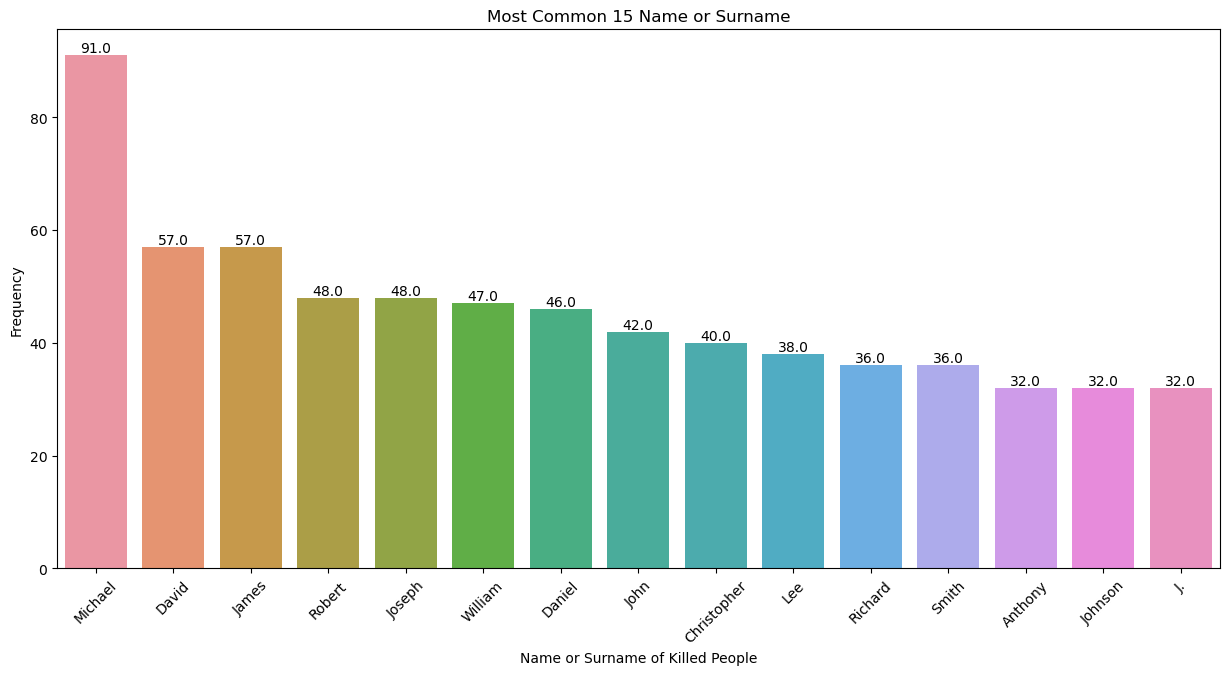

In [58]:
plt.figure(figsize=(15,7))          # alternative method like matplotlib
g=sns.barplot(x, y)
plt.xticks(rotation=45)
plt.xlabel('Name or Surname of Killed People')
plt.ylabel('Frequency')
plt.title('Most Common 15 Name or Surname')

for p in g.patches:
    g.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+0.5));

In [59]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [60]:
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [61]:
kill.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [62]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [63]:
kill.dropna(inplace=True)

In [64]:
kill.shape

(2254, 14)

In [65]:
kill.race.value_counts()

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [66]:
labels=kill.race.value_counts().index

In [67]:
sizes=kill.race.value_counts().values

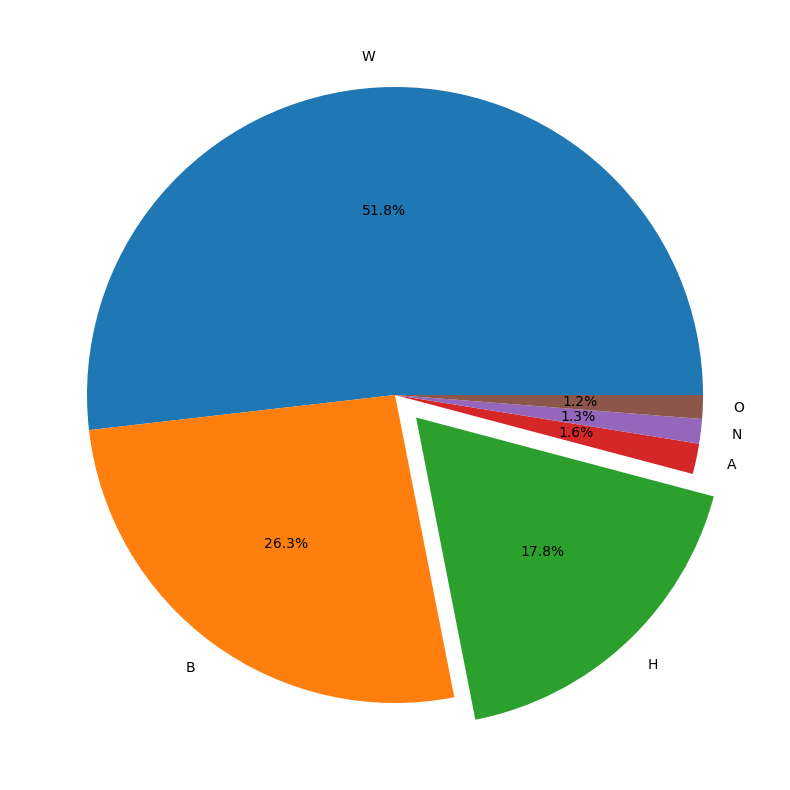

In [68]:
explode = (0, 0, 0.1, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=0);

In [79]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [78]:
kill.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

<AxesSubplot:xlabel='gender', ylabel='age'>

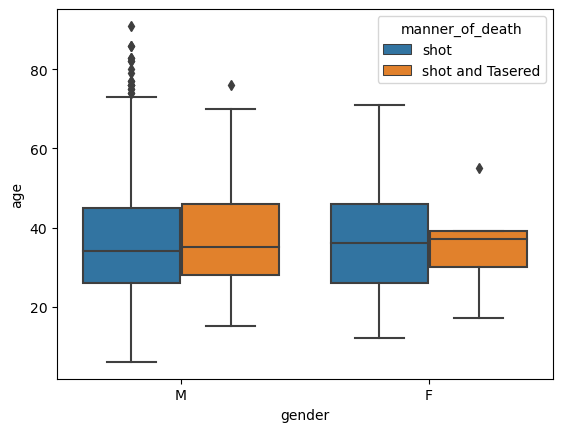

In [80]:
sns.boxplot(x="gender", y="age", hue="manner_of_death", data=kill)

<AxesSubplot:xlabel='gender', ylabel='age'>

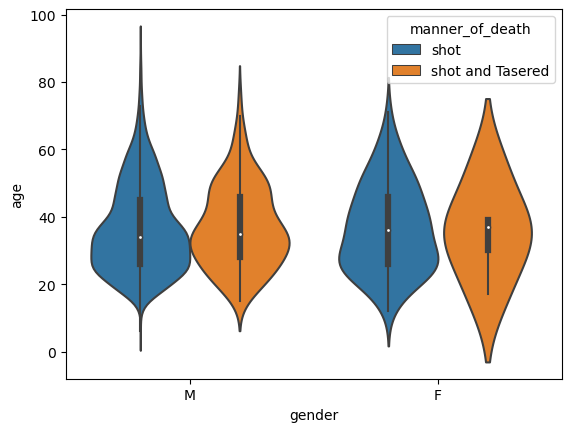

In [81]:
sns.violinplot(x="gender", y="age", hue="manner_of_death", data=kill)

In [82]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


<AxesSubplot:xlabel='gender', ylabel='age'>

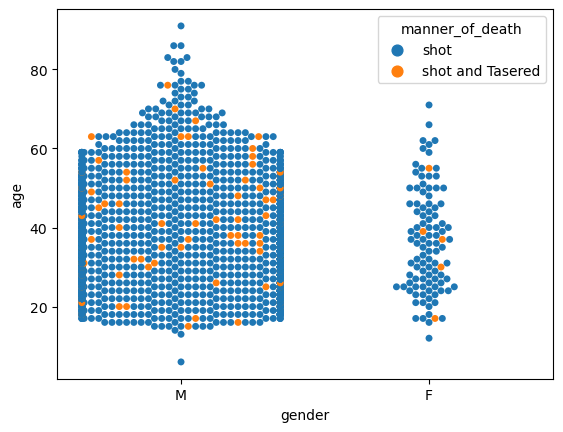

In [84]:
sns.swarmplot(x="gender", y="age", hue="manner_of_death", data=kill)

Text(0.5, 1.0, 'gender')

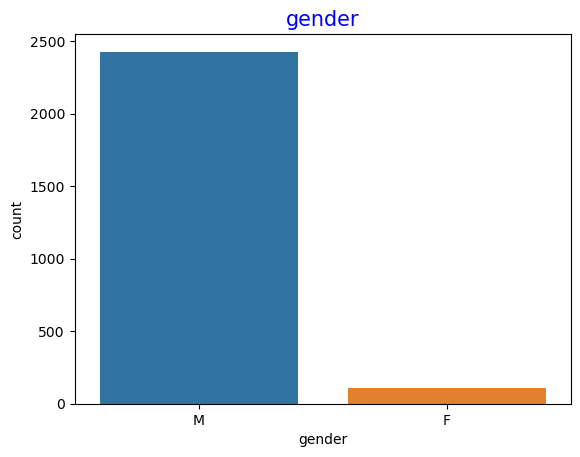

In [85]:
sns.countplot(kill.gender)
plt.title("gender",color = 'blue',fontsize=15)

In [86]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [87]:
kill.armed.unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', 'vehicle',
       'shovel', 'hammer', 'hatchet', 'undetermined', 'sword', 'machete',
       'box cutter', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'crossbow',
       'metal pole', 'Taser', 'metal pipe', 'metal hand tool',
       'blunt object', 'metal stick', 'sharp object', 'meat cleaver', nan,
       'carjack', 'chain', "contractor's level", 'unknown weapon',
       'stapler', 'beer bottle', 'bean-bag gun',
       'baseball bat and fireplace poker', 'straight edge razor',
       'gun and knife', 'ax', 'brick', 'baseball bat', 'hand torch',
       'chain saw', 'garden tool', 'scissors', 'pole', 'pick-axe',
       'flashlight', 'baton', 'spear', 'pitchfork', 'hatchet and gun',
       'rock', 'piece of wood', 'bayonet', 'pipe', 'glass shard',
       'motorcycle', 'metal rake', 'crowbar', 'oar', 'machete and gun',
       'tire iron', 'air conditioner', 'pole a

In [88]:
cc=kill.armed.value_counts()[:7].index

In [89]:
dd=kill.armed.value_counts()[:7].values

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'gun'),
  Text(1, 0, 'knife'),
  Text(2, 0, 'vehicle'),
  Text(3, 0, 'unarmed'),
  Text(4, 0, 'undetermined'),
  Text(5, 0, 'toy weapon'),
  Text(6, 0, 'machete')])

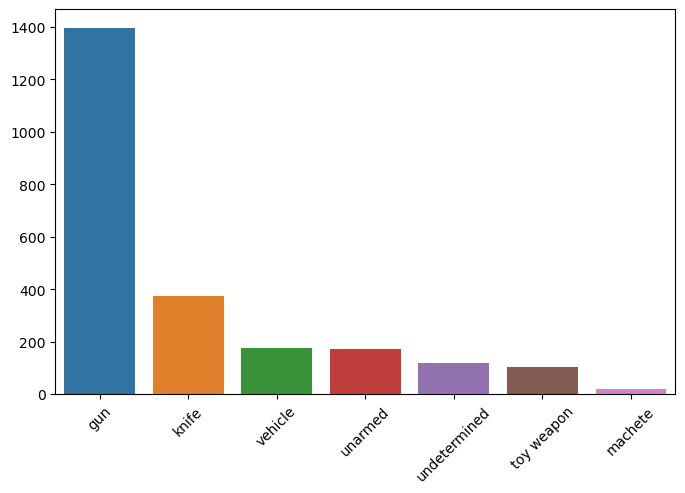

In [90]:
plt.figure(figsize=(8,5))
sns.barplot(cc,dd)
plt.xticks(rotation=45)

In [91]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [92]:
kill["age_cat"] = kill.age.apply(lambda x: "above25" if x >=25 else "below25")

In [93]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


<AxesSubplot:xlabel='age_cat', ylabel='count'>

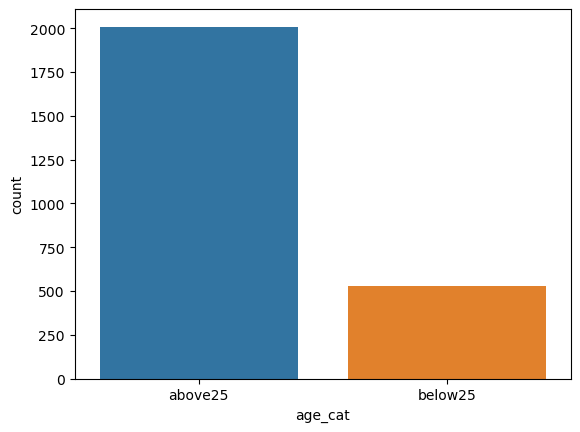

In [94]:
sns.countplot(x="age_cat", data=kill)

<AxesSubplot:xlabel='age_cat', ylabel='count'>

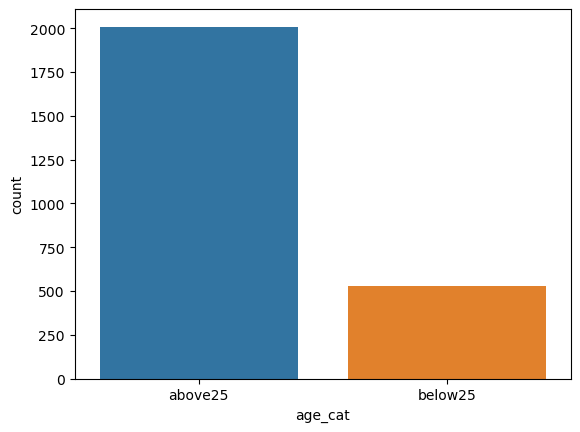

In [95]:
sns.countplot(x="age_cat", data=kill)

Text(0.5, 1.0, 'Race of killed people')

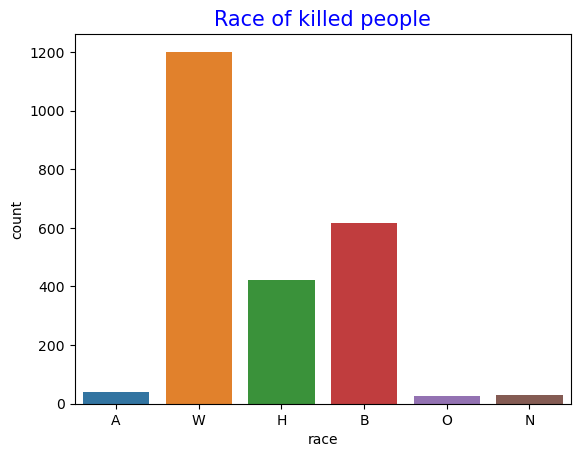

In [96]:
sns.countplot(x="race", data=kill)
plt.title('Race of killed people',color = 'blue',fontsize=15)

<AxesSubplot:xlabel='race', ylabel='count'>

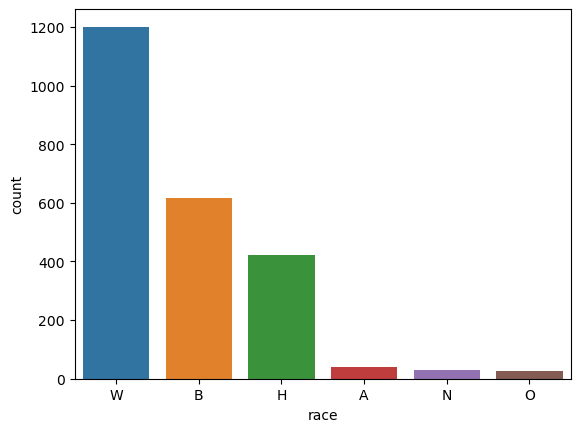

In [97]:
sns.countplot(kill.race, order=kill.groupby("race").race.count().sort_values(ascending=False).index)

In [98]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25
